DB Index: 0.8491558302577694


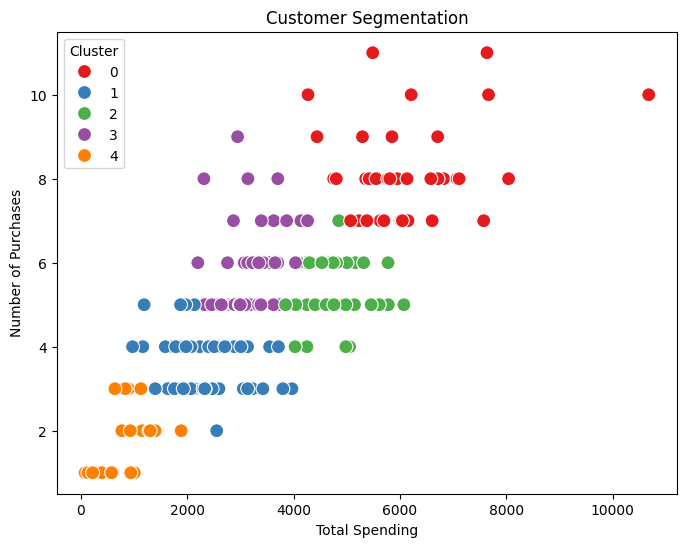

In [1]:
# Task 3: Customer Segmentation using Clustering

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
customers = pd.read_csv('../data/Customers.csv')
transactions = pd.read_csv('../data/Transactions.csv')

# Merge data
merged_data = transactions.merge(customers, on='CustomerID')

# Create features: total spending and number of transactions
customer_summary = merged_data.groupby('CustomerID').agg(
    total_spent=('TotalValue', 'sum'),
    num_purchases=('TransactionID', 'count')
).reset_index()

# Standardize the features
scaler = StandardScaler()
customer_summary_scaled = scaler.fit_transform(customer_summary[['total_spent', 'num_purchases']])

# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
customer_summary['Cluster'] = kmeans.fit_predict(customer_summary_scaled)

# Evaluate using Davies-Bouldin index
db_index = davies_bouldin_score(customer_summary_scaled, customer_summary['Cluster'])
print(f"DB Index: {db_index}")

# Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=customer_summary['total_spent'], y=customer_summary['num_purchases'], hue=customer_summary['Cluster'], palette='Set1', s=100)
plt.title('Customer Segmentation')
plt.xlabel('Total Spending')
plt.ylabel('Number of Purchases')
plt.show()

# Save the clustering result to a report
customer_summary.to_csv('../outputs/Task3_Clustering_Report.csv', index=False)
